In [1]:
import networkx as nx
from graph_qa.io.loader import load_graph
from graph_qa.llm.tools import find_paths, predict_subgraph
from graph_qa.llm.router import Router

G = load_graph('../graph_qa/data/demo_graph.jsonl')

paths = find_paths(G, 'A', 'C', max_len=4, k=2)
paths


[PathResult(path=['A', 'B', 'C'], hops=2, edges=[('A', 'B'), ('B', 'C')]),
 PathResult(path=['A', 'X', 'C'], hops=2, edges=[('A', 'X'), ('X', 'C')])]

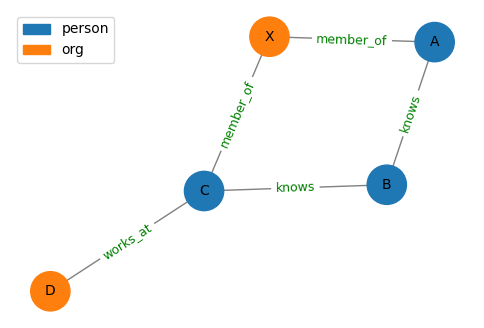

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G, seed=42)
node_colors = [
    "tab:blue" if G.nodes[n].get("type") == "person" else "tab:orange"
    for n in G.nodes
]
nx.draw_networkx(
    G,
    pos=pos,
    with_labels=True,
    node_color=node_colors,
    edge_color="gray",
    font_size=10,
    node_size=800,
)
edge_labels = {(u, v): G.edges[u, v].get("rel", "") for u, v in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="green", font_size=9)

import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color="tab:blue", label="person"),
    mpatches.Patch(color="tab:orange", label="org"),
]
plt.legend(handles=legend_handles, loc="best")
plt.axis("off")
plt.show()


In [3]:
res = predict_subgraph(G, anchors=['A','C'], hops=2, K=50, anchor_time=12)
res


{'anchors': ['A', 'C'],
 'nodes': [{'id': 'X', 'type': 'org', 'time': 3},
  {'id': 'A', 'type': 'person', 'time': 10},
  {'id': 'C', 'type': 'person', 'time': 12}],
 'edges': [{'u': 'X', 'v': 'C', 'p': 0.010353737531091752},
  {'u': 'A', 'v': 'X', 'p': 0.02231343869903223}],
 'method': 'temporal_egonet + stub_relgt + ksp/steiner'}

In [4]:
from graph_qa.llm.router import Router

ans = Router().ask(G, "What is the relationship between A and C?")
ans


{'result': {'paths': [{'path': ['A', 'B', 'C'],
    'hops': 2,
    'edges': [('A', 'B'), ('B', 'C')]},
   {'path': ['A', 'X', 'C'], 'hops': 2, 'edges': [('A', 'X'), ('X', 'C')]}]},
 'method': ['find_paths'],
 'evidence': {'k': 3, 'max_len': 6},
 'caveats': 'Path-based association only; not causal.'}